In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [88]:
combine = ['train.csv','test.csv']

In [89]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [90]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [91]:
#lets first define the types of cloumns into continous(numerical), categorical and 
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass
#Continous: Age, Fare. Discrete: SibSp, Parchs

In [92]:
train_df[['Survived','Pclass']].groupby(['Pclass']).mean().sort_values('Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [93]:
train_df[['Survived','Sex']].groupby(['Sex']).mean().sort_values('Survived',ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [94]:
train_df[['Survived','SibSp']].groupby(['SibSp']).mean().sort_values('Survived',ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [95]:
train_df[['Survived','Parch']].groupby(['Parch']).mean().sort_values('Survived',ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [96]:
train_df['Age_gaps'] = pd.cut(train_df['Age'],5)
train_df[['Survived','Age_gaps']].groupby(['Age_gaps']).mean().sort_values('Survived',ascending = False)

,Survived
Age_gaps,
"(0.34, 16.336]",0.550000
"(48.168, 64.084]",0.434783
"(32.252, 48.168]",0.404255
"(16.336, 32.252]",0.369942
"(64.084, 80.0]",0.090909


In [97]:
#analysed the above parameters because they have a very low co-relation between them and Survived parameter.

In [98]:
#lets look at some visualizations that we can get from this data.

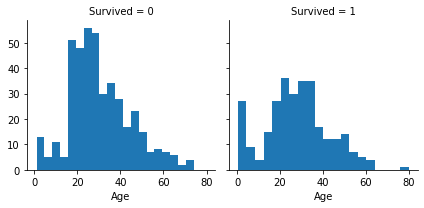

In [99]:
face_grid = sns.FacetGrid(train_df, col='Survived')
face_grid.map(plt.hist, 'Age', bins=20)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


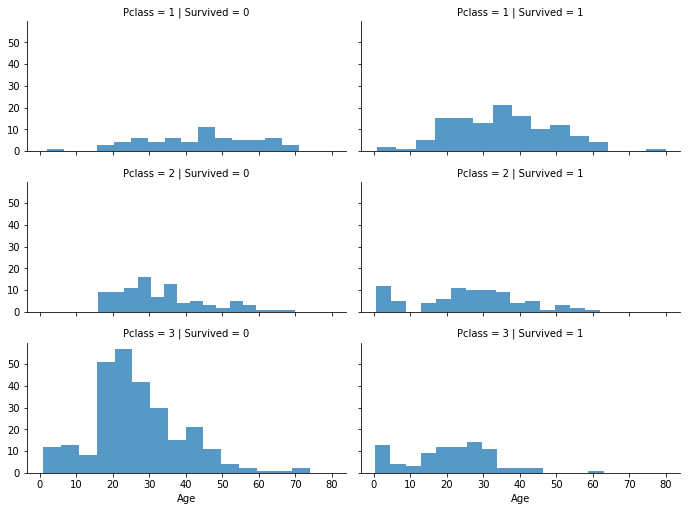

In [100]:
Pclass_grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.4, aspect=2.0)
Pclass_grid.map(plt.hist, 'Age', alpha=.75, bins=15)
Pclass_grid.add_legend()

In [101]:
# As we can observe most of class 3 people didn't survive
# And in class 2 more youungsters and children survived as compared to adults.
# And Class 1 as we saw earlier the survival rate is the best among all.

#  Let's start Data Wrangling(Cleaning) 

In [102]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

AttributeError: 'str' object has no attribute 'shape'

In [103]:
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin'], axis = 1)

In [104]:
combine = [train_df,test_df]
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_gaps
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(32.252, 48.168]"
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,"(16.336, 32.252]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,"(16.336, 32.252]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,"(16.336, 32.252]"


In [105]:
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis=1)

In [106]:
combine = [train_df,test_df]

In [107]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_gaps
0,0,3,male,1.0,1,0,7.2500,S,"(16.336, 32.252]"
1,1,1,female,2.0,1,0,71.2833,C,"(32.252, 48.168]"
2,1,3,female,1.0,0,0,7.9250,S,"(16.336, 32.252]"
3,1,1,female,2.0,1,0,53.1000,S,"(32.252, 48.168]"
4,0,3,male,2.0,0,0,8.0500,S,"(32.252, 48.168]"


In [108]:
train_df = train_df.drop(['Age_gaps'],axis = 1)


In [109]:
train_df.head(12)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,1.0,1,0,7.2500,S
1,1,1,female,2.0,1,0,71.2833,C
2,1,3,female,1.0,0,0,7.9250,S
3,1,1,female,2.0,1,0,53.1000,S
4,0,3,male,2.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,3.0,0,0,51.8625,S
7,0,3,male,0.0,3,1,21.0750,S
8,1,3,female,1.0,0,2,11.1333,S
9,1,2,female,0.0,1,0,30.0708,C


In [110]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [111]:
combine = [train_df,test_df]



In [112]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [113]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,1.0,7.2500,S,0
1,1,1,female,2.0,71.2833,C,0
2,1,3,female,1.0,7.9250,S,1
3,1,1,female,2.0,53.1000,S,0
4,0,3,male,2.0,8.0500,S,1


In [114]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,NaN,NaN,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [115]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [116]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [117]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,male,1.0,7.2500,0,0,3.0
1,1,1,female,2.0,71.2833,1,0,2.0
2,1,3,female,1.0,7.9250,0,1,3.0
3,1,1,female,2.0,53.1000,0,0,2.0
4,0,3,male,2.0,8.0500,0,1,6.0


In [118]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,male,2.0,7.8292,2,1,6.0
1,893,3,female,2.0,7.0000,0,0,6.0
2,894,2,male,3.0,9.6875,2,1,6.0
3,895,3,male,1.0,8.6625,0,1,3.0
4,896,3,female,1.0,12.2875,0,0,3.0


In [119]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [120]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,male,1.0,0,0,0,3.0
1,1,1,female,2.0,3,1,0,2.0
2,1,3,female,1.0,1,0,1,3.0
3,1,1,female,2.0,3,0,0,2.0
4,0,3,male,2.0,1,0,1,6.0
5,0,3,male,NaN,1,2,1,NaN
6,0,1,male,3.0,3,0,1,3.0
7,0,3,male,0.0,2,0,0,0.0
8,1,3,female,1.0,1,0,0,3.0
9,1,2,female,0.0,2,1,0,0.0


# Lets start predicting survivals usign machine learning algorithms

In [121]:
train_df['Age'].fillna(method='ffill', inplace=True, axis=0, limit = 10)
test_df['Age'].fillna(method='ffill', inplace=True, axis=0, limit = 10)
combine = [train_df,test_df]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,6.0,2.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [122]:
train_df

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,0,3,male,1.0,0,0,0,3.0
1,1,1,female,2.0,3,1,0,2.0
2,1,3,female,1.0,1,0,1,3.0
3,1,1,female,2.0,3,0,0,2.0
4,0,3,male,2.0,1,0,1,6.0
...,...,...,...,...,...,...,...,...
886,0,2,male,1.0,1,0,1,2.0
887,1,1,female,1.0,2,0,1,1.0
888,0,3,female,1.0,2,0,0,3.0
889,1,1,male,1.0,2,1,1,1.0


In [123]:
train_df['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

In [124]:
combine = [train_df,test_df]
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()
print(test_df)

     PassengerId  Pclass  Sex  Age  Fare  Embarked  IsAlone  Age*Class
0            892       3    0  2.0     0         2        1        6.0
1            893       3    1  2.0     0         0        0        6.0
2            894       2    0  3.0     1         2        1        6.0
3            895       3    0  1.0     1         0        1        3.0
4            896       3    1  1.0     1         0        0        3.0
..           ...     ...  ...  ...   ...       ...      ...        ...
413         1305       3    0  1.0     1         0        1        3.0
414         1306       1    1  2.0     3         1        1        2.0
415         1307       3    0  2.0     0         0        1        6.0
416         1308       3    0  2.0     1         0        1        6.0
417         1309       3    0  2.0     2         1        0        6.0

[418 rows x 8 columns]


In [127]:
test_df


,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,0,2.0,0,2,1,6.0
1,893,3,1,2.0,0,0,0,6.0
2,894,2,0,3.0,1,2,1,6.0
3,895,3,0,1.0,1,0,1,3.0
4,896,3,1,1.0,1,0,0,3.0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,1,0,1,3.0
414,1306,1,1,2.0,3,1,1,2.0
415,1307,3,0,2.0,0,0,1,6.0
416,1308,3,0,2.0,1,0,1,6.0


In [139]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [140]:
X_test

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,3,0,2.0,0,2,1,6.0
1,3,1,2.0,0,0,0,6.0
2,2,0,3.0,1,2,1,6.0
3,3,0,1.0,1,0,1,3.0
4,3,1,1.0,1,0,0,3.0
...,...,...,...,...,...,...,...
413,3,0,1.0,1,0,1,3.0
414,1,1,2.0,3,1,1,2.0
415,3,0,2.0,0,0,1,6.0
416,3,0,2.0,1,0,1,6.0


# Regression Analysis

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
# Logistic Regression




In [144]:
X_test.Age.dropna()

0      2.0
1      2.0
2      3.0
3      1.0
4      1.0
      ... 
413    1.0
414    2.0
415    2.0
416    2.0
417    2.0
Name: Age, Length: 418, dtype: float64

In [146]:
X_test.dropna()

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,3,0,2.0,0,2,1,6.0
1,3,1,2.0,0,0,0,6.0
2,2,0,3.0,1,2,1,6.0
3,3,0,1.0,1,0,1,3.0
4,3,1,1.0,1,0,0,3.0
...,...,...,...,...,...,...,...
413,3,0,1.0,1,0,1,3.0
414,1,1,2.0,3,1,1,2.0
415,3,0,2.0,0,0,1,6.0
416,3,0,2.0,1,0,1,6.0


In [147]:
X_test

,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,3,0,2.0,0,2,1,6.0
1,3,1,2.0,0,0,0,6.0
2,2,0,3.0,1,2,1,6.0
3,3,0,1.0,1,0,1,3.0
4,3,1,1.0,1,0,0,3.0
...,...,...,...,...,...,...,...
413,3,0,1.0,1,0,1,3.0
414,1,1,2.0,3,1,1,2.0
415,3,0,2.0,0,0,1,6.0
416,3,0,2.0,1,0,1,6.0


In [148]:
lr = LogisticRegression()

In [149]:
lr.fit(X_train, Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [154]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [158]:
lr.score(X_train, Y_train)

0.7867564534231201

In [160]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lr.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
1,Sex,2.515613
4,Embarked,0.334435
2,Age,0.266352
3,Fare,-0.029748
5,IsAlone,-0.033800
6,Age*Class,-0.275723
0,Pclass,-0.696088


In [161]:
# Support vector Classification

In [163]:
svm = SVC()
svm.fit(X_train,Y_train)
svm.score(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8249158249158249

In [164]:
svm.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [167]:
# KNN classifier

In [168]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
knn.score(X_train, Y_train)

[0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


0.8395061728395061

In [172]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
knn.score(X_train, Y_train)

[0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 0]


0.8316498316498316

In [173]:
# Gaussian Naive Bayes

In [174]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print(gnb.predict(X_test))
gnb.score(X_train, Y_train)

[0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 0]


0.7160493827160493

In [175]:
# Perceptron Classifier

In [176]:
perceptron_c = Perceptron()
perceptron_c.fit(X_train, Y_train)
print(perceptron_c.predict(X_test))
perceptron_c.score(X_train, Y_train)

[0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 1 0 1 0 0 0]


0.7283950617283951

In [177]:
# Stochastic Gradient Descent

sg_descent = SGDClassifier()
sg_descent.fit(X_train, Y_train)
print(sg_descent.predict(X_test))
sg_descent.score(X_train, Y_train)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 0]


0.7755331088664422

In [178]:
# Decision Tree

In [179]:
decision_t = DecisionTreeClassifier()
decision_t.fit(X_train, Y_train)
print(decision_t.predict(X_test))
decision_t.score(X_train, Y_train)

[0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]


0.8653198653198653